In [1]:
import pandas as pd
data=pd.read_csv("/content/mba_decision_dataset.csv")
print(data)

      Person ID  Age  Gender Undergraduate Major  Undergraduate GPA  \
0             1   27    Male                Arts               3.18   
1             2   24    Male                Arts               3.03   
2             3   33  Female            Business               3.66   
3             4   31    Male         Engineering               2.46   
4             5   28  Female            Business               2.75   
...         ...  ...     ...                 ...                ...   
9995       9996   33  Female           Economics               3.55   
9996       9997   30  Female            Business               2.48   
9997       9998   31  Female           Economics               2.86   
9998       9999   22  Female                Arts               2.30   
9999      10000   22    Male                Arts               2.86   

      Years of Work Experience Current Job Title  Annual Salary (Before MBA)  \
0                            8      Entrepreneur                   

In [2]:
data.isna().sum()

Person ID                         0
Age                               0
Gender                            0
Undergraduate Major               0
Undergraduate GPA                 0
Years of Work Experience          0
Current Job Title                 0
Annual Salary (Before MBA)        0
Has Management Experience         0
GRE/GMAT Score                    0
Undergrad University Ranking      0
Entrepreneurial Interest          0
Networking Importance             0
MBA Funding Source                0
Desired Post-MBA Role             0
Expected Post-MBA Salary          0
Location Preference (Post-MBA)    0
Reason for MBA                    0
Online vs. On-Campus MBA          0
Decided to Pursue MBA?            0
dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder
b=LabelEncoder()
data["Gender"]=b.fit_transform(data["Gender"])
data["Undergraduate Major"]=b.fit_transform(data["Undergraduate Major"])
data["Current Job Title"]=b.fit_transform(data["Current Job Title"])
data["Has Management Experience"]=b.fit_transform(data["Has Management Experience"])
data["MBA Funding Source"]=b.fit_transform(data["MBA Funding Source"])
data["Desired Post-MBA Role"]=b.fit_transform(data["Desired Post-MBA Role"])
data["Location Preference (Post-MBA)"]=b.fit_transform(data["Location Preference (Post-MBA)"])
data["Reason for MBA"]=b.fit_transform(data["Reason for MBA"])
data["Online vs. On-Campus MBA"]=b.fit_transform(data["Online vs. On-Campus MBA"])
data["Decided to Pursue MBA?"]=b.fit_transform(data["Decided to Pursue MBA?"])
print(data)


      Person ID  Age  Gender  Undergraduate Major  Undergraduate GPA  \
0             1   27       1                    0               3.18   
1             2   24       1                    0               3.03   
2             3   33       0                    1               3.66   
3             4   31       1                    3               2.46   
4             5   28       0                    1               2.75   
...         ...  ...     ...                  ...                ...   
9995       9996   33       0                    2               3.55   
9996       9997   30       0                    1               2.48   
9997       9998   31       0                    2               2.86   
9998       9999   22       0                    0               2.30   
9999      10000   22       1                    0               2.86   

      Years of Work Experience  Current Job Title  Annual Salary (Before MBA)  \
0                            8                  3     

In [5]:
x=data.drop("Decided to Pursue MBA?",axis=1)
y=data["Decided to Pursue MBA?"]

In [10]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.02)
print(xtrain)
print(ytrain)

      Person ID  Age  Gender  Undergraduate Major  Undergraduate GPA  \
8715       8716   33       0                    3               2.25   
9673       9674   32       1                    1               3.75   
6623       6624   25       0                    4               2.70   
723         724   32       1                    0               3.16   
4291       4292   27       1                    2               2.08   
...         ...  ...     ...                  ...                ...   
3705       3706   32       1                    1               2.12   
4665       4666   25       1                    3               2.50   
9948       9949   25       1                    0               3.78   
8132       8133   34       0                    1               3.92   
2837       2838   25       0                    4               3.05   

      Years of Work Experience  Current Job Title  Annual Salary (Before MBA)  \
8715                         2                  2     

In [13]:
from sklearn.linear_model import LogisticRegression
br=LogisticRegression()
br.fit(xtrain,ytrain)
ypred=br.predict(xtest)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
c=br.predict([[10001,28,0,1,3.76,8,0,60000,1,701,3,8.9,2.0,0,1,67540,1,0,0]])
print(c)

[1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<BarContainer object of 10000 artists>

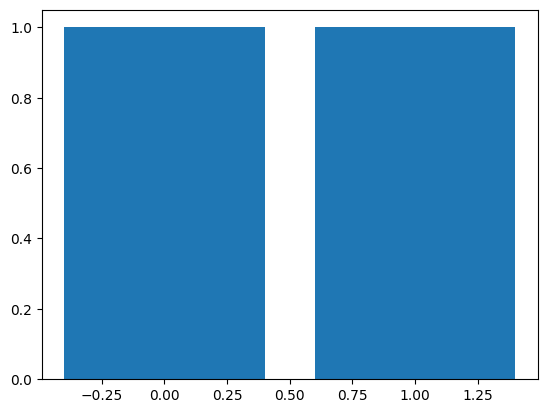

In [20]:
from matplotlib import pyplot as plt
plt.bar(data["Online vs. On-Campus MBA"],data["Decided to Pursue MBA?"])

In [15]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest,ypred))

[[  0  89]
 [  0 111]]


In [17]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,ypred))

0.555


In [18]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        89
           1       0.56      1.00      0.71       111

    accuracy                           0.56       200
   macro avg       0.28      0.50      0.36       200
weighted avg       0.31      0.56      0.40       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
